In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle

%matplotlib inline

# DRILL: Mo' blobs, mo' problems?
You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ( k-means, mean shift, spectral clustering and affinity propagation) on each one. Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups.

In [46]:
def compare_clusters(X_trn, y_trn, centers):
        
    ### K-means
    n_clusters=len(set(y_trn))
    k_y_pred = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(X_trn)

    ### Mean Shift
    bandwidth = estimate_bandwidth(X_trn, quantile=0.2, n_samples=500)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_trn)
    ms_labels = ms.labels_
    ms_cluster_centers = ms.cluster_centers_

    ### Spectral
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(X_trn)
    sc_predict=sc.fit_predict(X_trn)
    
    ### Affinity Propagation
    af = AffinityPropagation(preference=-50, damping=0.9).fit(X_trn)
    af_cluster_centers_indices = af.cluster_centers_indices_
    af_n_clusters_ = len(af_cluster_centers_indices)
    af_labels = af.labels_
    

    # Start plotting, same order as above
    plt.figure(figsize=(12,8))
    
    ax1 = plt.subplot(221)
    plt.scatter(X_trn[:, 0], X_trn[:, 1], c=k_y_pred)  
    scattify()
    plt.title('K means')
    
    ax2 = plt.subplot(222)
    plt.scatter(X_trn[:, 0], X_trn[:, 1], c=ms_labels)
    scattify()    
    plt.title("Mean Shift (Est. clusters: {})".format(len(np.unique(ms_labels))))
    
    ax3 = plt.subplot(223)
    plt.scatter(X_trn[:, 0], X_trn[:, 1], c=sc_predict)
    scattify()
    plt.title('Spectral')
    
    ax4 = plt.subplot(224)
    
    # Cycle through each cluster and graph them with a center point for the
    # exemplar and lines from the exemplar to each data point in the cluster.
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    
    for k, col in zip(range(af_n_clusters_), colors):
        class_members = af_labels == k
        cluster_center = X_trn[af_cluster_centers_indices[k]]
        plt.plot(X_trn[class_members, 0], X_trn[class_members, 1], col + '.')
        plt.plot(cluster_center[0],
                 cluster_center[1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k')
        for x in X_trn[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)      
    
    scattify()
    plt.title('Affinity Propagation (Est. clusters: {})'.format(af_n_clusters_))
    plt.show()
      
    names = ['K-means', 'Mean Shift', 'Spectral Affinity']
    models = [k_y_pred, ms_labels, sc_predict]
    show_crosstabs(names, models, y_trn)

In [45]:
# Simply display cross-tabulation results for each model
def show_crosstabs(names, models, y_trn):
    for idx, model in enumerate(models):
        print(names[idx] + ' crosstab:')
        print(pd.crosstab(model, y_trn), '\n')
    return None

        
# Reducing repeated code and visual noise
def blobbify(centers):
    return make_blobs(n_samples=10000,
                      centers=centers,
                      cluster_std=1,
                      n_features=2,
                      random_state=42)


# Further visual noise reduction
def scattify():
    plt.scatter([x[0] for x in centers], [x[1] for x in centers],
                s=300, marker='*', color='black', alpha=0.2)
    return None

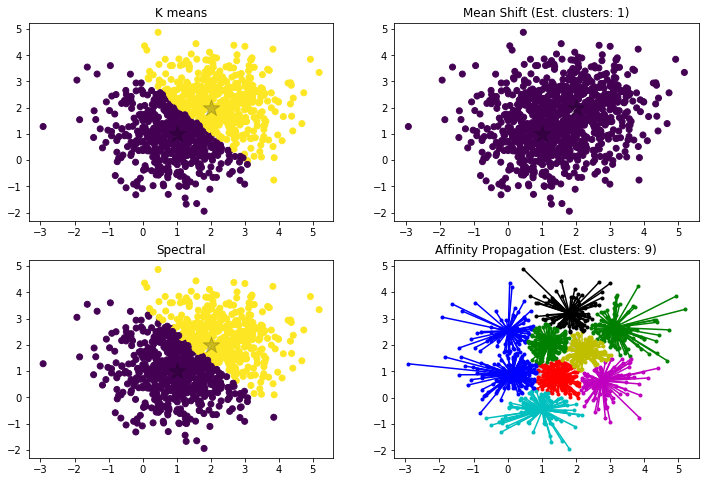

K-means crosstab:
col_0    0    1
row_0          
0      397  120
1      115  368 

Mean Shift crosstab:
col_0    0    1
row_0          
0      512  488 

Spectral Affinity crosstab:
col_0    0    1
row_0          
0      430  155
1       82  333 



In [47]:
# First set
centers = [[1, 1], [2, 2]]
X, y = blobbify(centers)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

compare_clusters(X_train, y_train, centers)

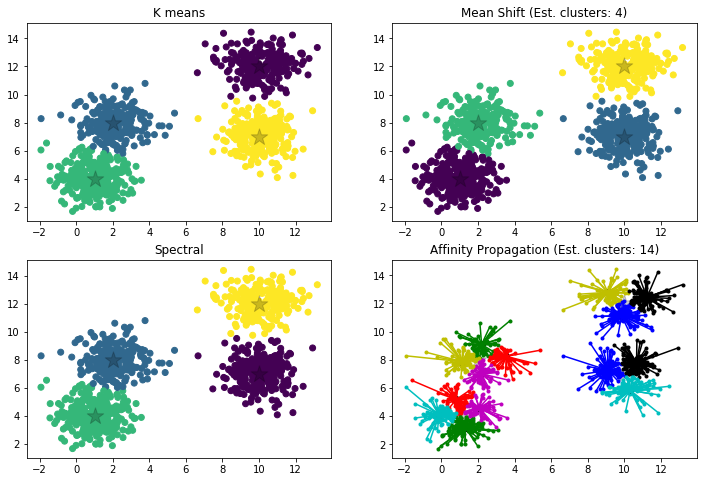

K-means crosstab:
col_0    0    1    2    3
row_0                    
0        0    0  236    1
1        1  230    0    0
2      272    9    0    0
3        0    0    2  249 

Mean Shift crosstab:
col_0    0    1    2    3
row_0                    
0      272    9    0    0
1        0    0    2  249
2        1  230    0    0
3        0    0  236    1 

Spectral Affinity crosstab:
col_0    0    1    2    3
row_0                    
0        0    0    2  249
1        0  229    0    0
2      273   10    0    0
3        0    0  236    1 



In [50]:
# Second set
centers = [[1, 4], [2, 8], [10, 12], [10, 7]]
X, y = blobbify(centers)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

compare_clusters(X_train, y_train, centers)

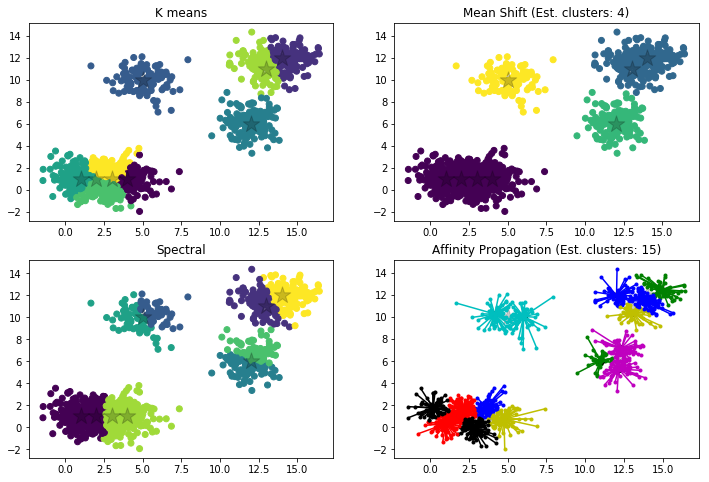

K-means crosstab:
col_0   0   1   2   3   4   5    6    7
row_0                                  
0       1   5  26  66   0   0    0    0
1       0   0   0   0  90  45    0    0
2       0   0   0   0   0   0    0  110
3       0   0   0   0   0   0  140    0
4      98  45   7   2   0   0    0    0
5      24  44  45  18   0   0    0    0
6       0   0   0   0  34  69    0    0
7      15  41  51  24   0   0    0    0 

Mean Shift crosstab:
col_0    0    1    2    3    4    5    6    7
row_0                                        
0      138  135  129  110    0    0    0    0
1        0    0    0    0  124  113    0    0
2        0    0    0    0    0    1  140    0
3        0    0    0    0    0    0    0  110 

Spectral Affinity crosstab:
col_0    0   1   2    3   4   5   6   7
row_0                                  
0      132  99  36    7   0   0   0   0
1        0   0   0    0  29  66   0   0
2        0   0   0    0   0   0   0  51
3        0   0   0    0   0   0  69   0
4        0   

In [49]:
# Third set
centers = [[1, 1], [2, 1], [3, 1], [4, 1], [14,12], [13,11], [12,6], [5,10]]
X, y = blobbify(centers)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

compare_clusters(X_train, y_train, centers)

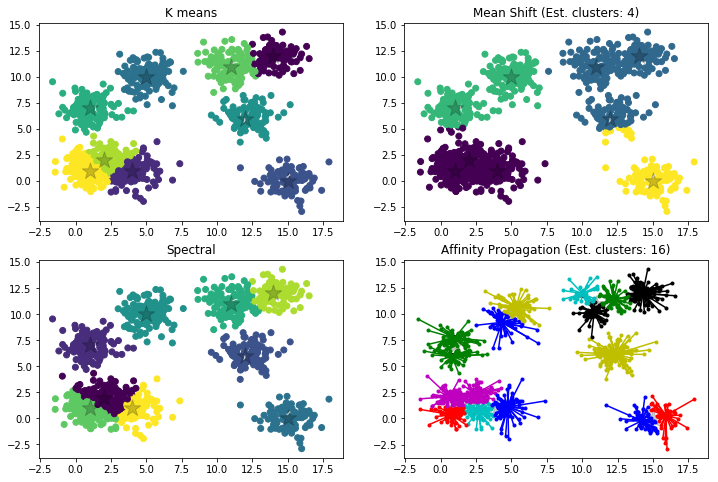

K-means crosstab:
col_0    0   1    2   3   4    5   6    7   8
row_0                                        
0        0   0    0   0  88    7   0    0   0
1        5   9    0  86   0    0   0    0   0
2        0   0    0   0   0    0   0    0  98
3        0   0    0   0   0    1   0  125   0
4        0   0    0   0   0    1  93    0   0
5        0   0  113   0   0    0   0    1   0
6        0   0    0   0  12  107   1    0   0
7       14  85    1  14   0    0   0    0   0
8      102  33    0   4   0    0   0    0   0 

Mean Shift crosstab:
col_0    0    1    2    3    4    5   6    7   8
row_0                                           
0      121  127    6  104    0    0   0    0   0
1        0    0    0    0  100  116  82    0   0
2        0    0  108    0    0    0   0  126   0
3        0    0    0    0    0    0  12    0  98 

Spectral Affinity crosstab:
col_0   0    1    2   3   4    5   6    7   8
row_0                                        
0      32  102    1  23   0    0   0 

In [52]:
# Fourth set
centers = [[1, 1], [2, 2], [1, 7], [4, 1], [14,12], [11,11], [12,6], [5,10], [15,0]]
X, y = blobbify(centers)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

compare_clusters(X_train, y_train, centers)

# Results

K-means is pretty good, despite needing some adjustment; overlapping groups can be a problem, but that's to be expected.  Considering that it's the most simple and straightforward, I was impressed by its performance.  Often it performed as well as Spectral and Mean Shift.  This would certainly be my go-to starter.

Mean Shift: this problem set doesn't really let it shine.  In different circumstances (especially where it's choosing K), it would perform much better.  It's got difficulty distinguishing between closely clustered groups.

Spectral Affinity: my favorite, at least in this scenario.  It did pretty well at distinguishing overlapping groups, and seemed to tie for 2nd place with K-means.  For what we're doing here, I'd stick with these two.  Look at the 4th set, they essentially got the same clusters.

Affinity Propagation: lots of tweaking necessary and very consistent in overestimation.  Again, I don't think it can shine here, and would be better in other data sets.  I didn't cross-tabulate with Affinity Propagation in case it estimated a big number of clusters and filled the screen with its crosstab...